<a href="https://colab.research.google.com/github/ami29839/slo2k21/blob/main/UTS_AryaMaulanaI_2101202079_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Colab

/content/drive/MyDrive/Colab


In [3]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from PIL import ImageFilter
from imutils import paths
import numpy as np
import os

In [4]:
print("(INFO) loading images...")
imagePaths=paths.list_images("3scene")
data=[]
labels=[]

(INFO) loading images...


In [5]:
for imagePath in imagePaths:
  image=Image.open(imagePath)
  image=image.filter(ImageFilter.SMOOTH)
  image = image.filter(ImageFilter.SMOOTH_MORE)
  image=np.array(image.resize((128,128))) / 255.0
  data.append(image)
  label=imagePath.split(os.path.sep)[-2]
  labels.append(label)

In [6]:
print(labels)

['coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 

In [7]:
lb=LabelBinarizer()
labels=lb.fit_transform(labels)

In [8]:
print(labels)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 1 0]
 [0 1 0]
 [0 1 0]]


In [9]:
print(np.array(data).shape)

(948, 128, 128, 3)


In [10]:
(trainX, testX, trainY, testY)=train_test_split(np.array(data), np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(711, 128, 128, 3)
(237, 128, 128, 3)


In [11]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense, Dropout
model=Sequential(
    [
     Flatten(input_shape=(128*128*3,)),
     Dense(1024, activation="relu"),
     Dropout(0.2),
     Dense(512, activation="relu"),
     Dropout(0.2),
     Dense(256, activation="relu"),
     Dropout(0.2),
     Dense(128, activation="relu"),
     Dropout(0.2),
     Dense(64, activation="relu"),
     Dropout(0.2),
     #Dense(32, activation="relu"),
     #Dropout(0.2),
     #Dense(16, activation="relu"),
     #Dropout(0.2),
     #Dense(8, activation="relu"),
     #Dropout(0.2),
     #Dense(4, activation="relu"),
     Dense(3, activation="softmax"),
    ]
)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 49152)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              50332672  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0

In [13]:
print("(INFO) training network.....")
opt = Adam(lr=1e-3, decay=1e-3 )
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=195)

(INFO) training network.....
Epoch 1/100
4/4 [==============================] - 4s 291ms/step - loss: 7.6242 - accuracy: 0.3295 - val_loss: 6.0190 - val_accuracy: 0.3376
Epoch 2/100
4/4 [==============================] - 0s 91ms/step - loss: 7.9979 - accuracy: 0.3457 - val_loss: 1.3876 - val_accuracy: 0.4008
Epoch 3/100
4/4 [==============================] - 0s 85ms/step - loss: 4.7066 - accuracy: 0.3496 - val_loss: 1.0104 - val_accuracy: 0.4346
Epoch 4/100
4/4 [==============================] - 0s 80ms/step - loss: 3.2813 - accuracy: 0.3356 - val_loss: 1.0929 - val_accuracy: 0.2658
Epoch 5/100
4/4 [==============================] - 0s 84ms/step - loss: 2.3949 - accuracy: 0.3455 - val_loss: 1.1626 - val_accuracy: 0.4008
Epoch 6/100
4/4 [==============================] - 0s 80ms/step - loss: 1.8053 - accuracy: 0.3751 - val_loss: 1.0818 - val_accuracy: 0.4135
Epoch 7/100
4/4 [==============================] - 0s 78ms/step - loss: 1.5515 - accuracy: 0.3635 - val_loss: 1.0203 - val_accurac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


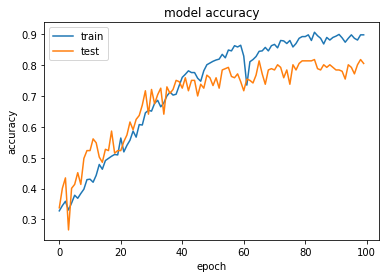

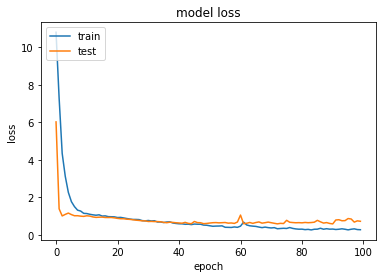

In [14]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()